# Random Sample Imputation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Survived', 'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
df['Age'].dropna().sample(df.Age.isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [28]:
def impute(df, variable):
    df[variable+'_rand'] = df[variable]
    rand_samp = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    rand_samp.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_rand'] = rand_samp

In [29]:
impute(df, 'Age')

In [30]:
df.head(10)

,Survived,Age,Fare,Age_rand
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,28.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [31]:
def impute_median(df, var):
    df[var+'_median'] = df[var].fillna(df[var].median())

In [32]:
impute_median(df, 'Age')

In [33]:
df.head(10)

,Survived,Age,Fare,Age_rand,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,28.0,28.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

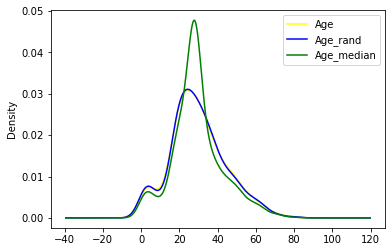

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='yellow')
df['Age_rand'].plot(kind='kde', ax=ax, color='blue')
df['Age_median'].plot(kind='kde', ax=ax, color='green')
line, label = ax.get_legend_handles_labels()
ax.legend(line, label, loc='best')

In [39]:
df.Age.mode()[0]

24.0